In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [119]:
data=pd.read_csv('train-chennai-sale.csv')

In [120]:
data.shape


(7109, 22)

In [121]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [122]:
data.dtypes


PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [123]:
data=data.drop(columns =['PRT_ID','REG_FEE','COMMIS'])

In [124]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


AREA

In [125]:
data.AREA.unique()


array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

CORRECT THE SPELLING MISTAKES

In [126]:
data['AREA'] = data['AREA'].replace(['Chrompt','Chrmpet','Chormpet','TNagar','Karapakam','Ana Nagar','Velchery','Ann Nagar','Adyr','KKNagar'],
                     ['Chrompet','Chrompet','Chrompet','T Nagar','Karapakkam','Anna Nagar','Velachery','Anna Nagar','Adyar','KK Nagar'])



In [127]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [128]:
data.AREA.isnull().sum()

0

INT_SQFT

In [129]:
data.INT_SQFT.dtypes


dtype('int64')

In [130]:
data.INT_SQFT.isnull().sum()

0

Check for Outliers

In [131]:
data.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

No Outliers in INT_SQFT

DATE_SALE

In [132]:
 data.DATE_SALE.dtypes
 #data type is object

dtype('O')

In [133]:
data['DATE_SALE'].head()

0    04-05-2011
1    19-12-2006
2    04-02-2012
3    13-03-2010
4    05-10-2009
Name: DATE_SALE, dtype: object

In [134]:
#Convert data type of Date sale and calculating the derived attribute Age

data.DATE_BUILD = pd.to_datetime(data.DATE_BUILD)
data.DATE_SALE = pd.to_datetime(data.DATE_SALE)





In [135]:
data.DATE_BUILD = data.DATE_BUILD.dt.year
data.DATE_SALE = data.DATE_SALE.dt.year


In [136]:
data['SOLD_AGE']= data.DATE_SALE-data.DATE_BUILD

In [137]:
data.SOLD_AGE

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: SOLD_AGE, Length: 7109, dtype: int64

In [138]:
data= data.drop(columns = ['DATE_BUILD','DATE_SALE'])

In [139]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SOLD_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


DIST_MAINROAD

In [140]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [141]:
data.DIST_MAINROAD.isnull().sum()

0

N_BEDROOM

In [142]:
data.N_BEDROOM.dtypes

dtype('float64')

In [143]:
#data.N_BEDROOM = data.N_BEDROOM.astype('int64')
# it was not running before, some null values were present

In [144]:
data.N_BEDROOM.describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [145]:
data.N_BEDROOM.isnull().sum()

1

In [146]:
#As there as 1 NULL value present, we will fill it with MODE
data= data.fillna(data["N_BEDROOM"].mean())

In [147]:
data.N_BEDROOM.isnull().sum()

0

In [148]:
data.N_BEDROOM = data.N_BEDROOM.astype('int64')
# it was not running before, some null values were present

N_BATHROOM

In [149]:
data.N_BATHROOM.describe()

count    7109.000000
mean        1.213558
std         0.409649
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [150]:
data.N_BATHROOM.isnull().sum()

0

N_ROOM

In [151]:
data.N_ROOM.describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [152]:
data.N_ROOM.isnull().sum()

0

SALE_COND

In [153]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [154]:
data['SALE_COND'] = data['SALE_COND'].replace(['Adj Land','Ab Normal','Partiall','PartiaLl'],
                                    ['AdjLand','AbNormal','Partial','Partial'])

In [155]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [156]:
data.SALE_COND.isnull().sum()

0

PARK_FACIL

In [157]:
data.PARK_FACIL.isnull().sum()

0

In [158]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [159]:
data.PARK_FACIL.replace('Noo','No',inplace=True)

In [160]:
data.PARK_FACIL.unique()

#encoding is needed here for this column

array(['Yes', 'No'], dtype=object)

BUILDTYPE

In [161]:
data.BUILDTYPE.isnull().sum()

0

In [162]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [163]:
data['BUILDTYPE'] = data['BUILDTYPE'].replace(['Other','Comercial'],
                                              ['Others','Commercial'])

In [164]:
data.BUILDTYPE.unique()

#Here also we can do encoding

array(['Commercial', 'Others', 'House'], dtype=object)

In [165]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SOLD_AGE
0,Karapakkam,1004,131,1,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [166]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [167]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].replace(['NoSeWa','NoSewr ','All Pub'],
                                                      ['No Sewage','No Sewer','AllPub'])

In [168]:
data.UTILITY_AVAIL.unique()


array(['AllPub', 'ELO', 'No Sewer', 'No Sewage'], dtype=object)

STREET

In [169]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [170]:
data['STREET'] = data['STREET'].replace(['Pavd','NoAccess'],
                                        ['Paved','No Access'])

In [171]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [172]:
data.STREET.isnull().sum()

0

MZZONE

In [173]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [174]:
data.MZZONE.isnull().sum()

#here encoding is needed

0

SALES_PRICE

In [175]:
data.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [176]:
data.SALES_PRICE.isnull().sum()

0

QS_ROOMS

In [177]:
data.QS_ROOMS.isnull().sum()

0

In [178]:
data.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

QS_BATHROOM

In [179]:
data.QS_BATHROOM.isnull().sum()

0

In [180]:
data.QS_BATHROOM.describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

QS_BEDROOM

In [181]:
data.QS_BEDROOM.isnull().sum()

0

In [182]:
data.QS_BEDROOM.describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

QS_OVERALL

In [183]:
data.QS_OVERALL.isnull().sum()

0

In [184]:
data.QS_OVERALL.describe()

count    7109.000000
mean        3.490653
std         0.547218
min         1.637029
25%         3.120000
50%         3.500000
75%         3.880000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [185]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SOLD_AGE
0,Karapakkam,1004,131,1,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [186]:
categorical_feature=[feature for feature in data.columns if data[feature].dtypes == 'O']
categorical_feature


['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [187]:
print(len(categorical_feature))

7


In [188]:
numerical_feature=[feature for feature in data.columns if data[feature].dtypes != 'O']
numerical_feature

['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE',
 'SOLD_AGE']

In [189]:
print(len(numerical_feature))


11


In [190]:
print(len(data.columns))

18


In [191]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SOLD_AGE
0,Karapakkam,1004,131,1,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


EXPLORATORY DATA ANALYSIS

AREA PLOT

Text(0.5, 1.0, 'FEATURE VS TARGET')

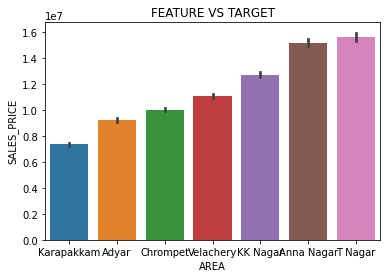

In [192]:
sns.barplot(x=data.AREA,y=data.SALES_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('FEATURE VS TARGET')

In [193]:
#Q1. Is there a relationship between feature and target variable?
#Q2. Is there a linear relationship betwen feature and target variable?
#Q3. what kind of encoding has to be done ???


#1. Yes
#2. Linear relationship
#3.You have to do label encoding here

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


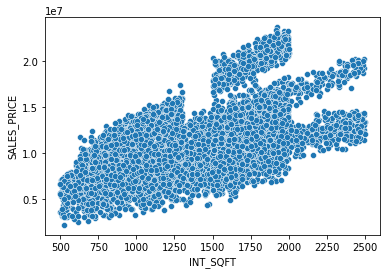

In [194]:
sns.scatterplot(data=data,x='INT_SQFT',y='SALES_PRICE')
data[['INT_SQFT','SALES_PRICE']].corr()

* *YES*
* *LINEAR RELATINSHIP IS PRESENT*
* *NO TRANSFORMATION REQUIRED*

DIST_MAINROAD

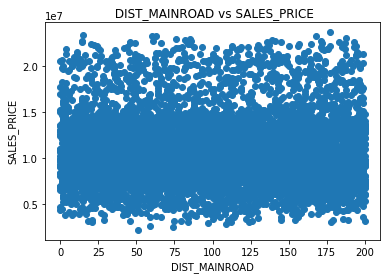

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


In [195]:
plt.scatter(data["DIST_MAINROAD"], data["SALES_PRICE"])
#plt.xticks(rotation= "vertical")
plt.title(" DIST_MAINROAD vs SALES_PRICE")
plt.xlabel("DIST_MAINROAD")
plt.ylabel("SALES_PRICE")
plt.show()
data[['DIST_MAINROAD','SALES_PRICE']].corr()

NO LINEAR RELATIONSHIP
TRANSFORMATION REQUIRED

N_BEDROOM

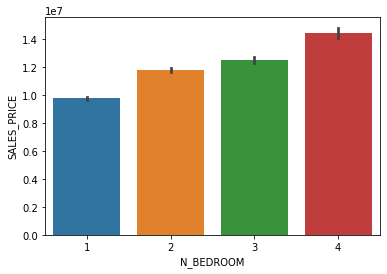

In [196]:
sns.barplot(data = data,x = 'N_BEDROOM', y = 'SALES_PRICE')

*   **Has a linear relationship**
*   **No transformation required**

N_BATHROOM

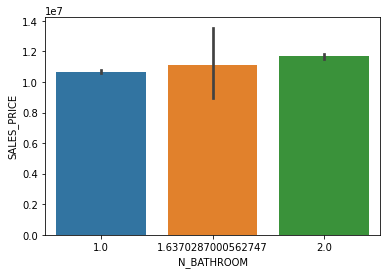

In [197]:
sns.barplot(data = data,x = 'N_BATHROOM', y = 'SALES_PRICE')

*   **Has a linear relationship**
*   **No transformation required**

N_ROOMS

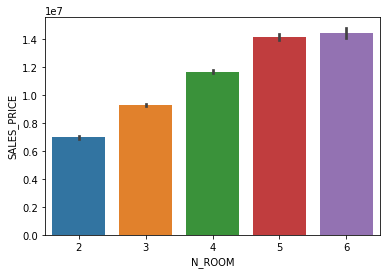

In [198]:
sns.barplot(data = data,x = 'N_ROOM', y = 'SALES_PRICE')

*   **Has a linear relationship**
*   **No transformation required**

SALE_COND

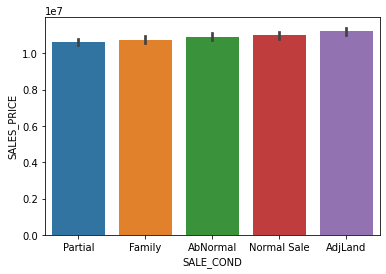

In [199]:
sns.barplot(data = data,x = 'SALE_COND', y = 'SALES_PRICE',order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

*   **Has a linear relationship**
*   **Label Encoding**

UTILITY_AVAIL

,SALES_PRICE
SALES_PRICE,1.0


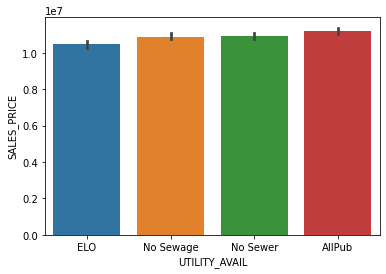

In [200]:
sns.barplot(data=data,x='UTILITY_AVAIL',y='SALES_PRICE',order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
data[['UTILITY_AVAIL','SALES_PRICE']].corr()

*   **Has a linear relationship**
*   **Label Encoding**

PARK_FACIL

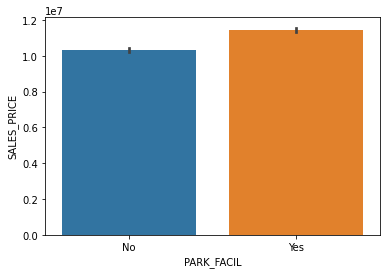

In [201]:
sns.barplot(data=data,x='PARK_FACIL',y='SALES_PRICE',order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

*   **Has a linear relationship**
*   **Label Encoding**

BUILDTYPE PLOT

Text(0.5, 1.0, 'FEATURE VS TARGET')

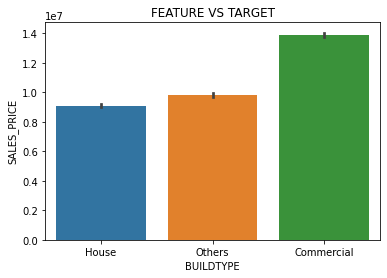

In [202]:
sns.barplot(x=data.BUILDTYPE,y=data.SALES_PRICE,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('FEATURE VS TARGET')

*   **No linear relationship**
*   **One-hot Encoding**

STREET

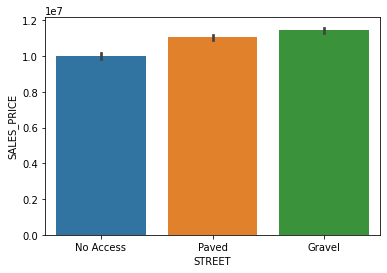

In [203]:
sns.barplot(data=data,x='STREET',y='SALES_PRICE',order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

*   **Has a linear relationship**
*   **Label Encoding**

MZZONE

Text(0.5, 1.0, 'FEATURE VS TARGET')

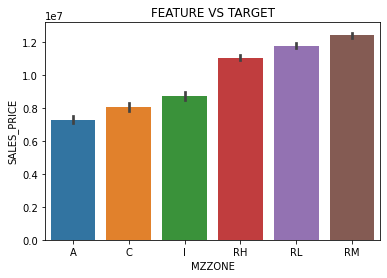

In [204]:
sns.barplot(x=data.MZZONE,y=data.SALES_PRICE,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('FEATURE VS TARGET')

*   **Has a linear relationship**
*   **Label Encoding**

In [205]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SOLD_AGE
0,Karapakkam,1004,131,1,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


SOLD_AGE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


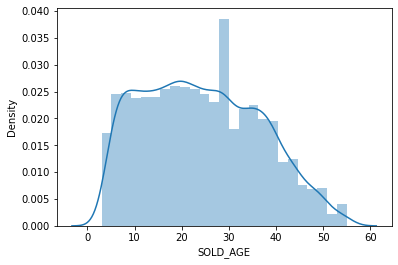

In [206]:
sns.distplot(data['SOLD_AGE'])

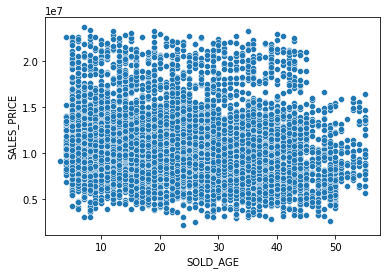

In [207]:
sns.scatterplot(data = data,x='SOLD_AGE',y='SALES_PRICE')

*   **No linear relationship**

QS_ROOMS

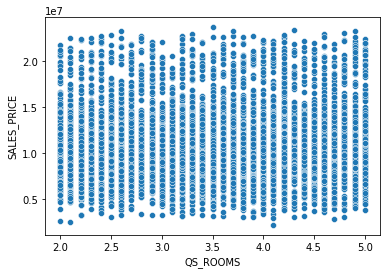

In [208]:
sns.scatterplot(data=data,x = 'QS_ROOMS',y = 'SALES_PRICE')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


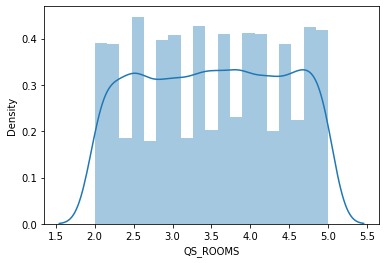

In [209]:
sns.distplot(data['QS_ROOMS'])

*   **No linear relationship**

QS_BATHROOM	

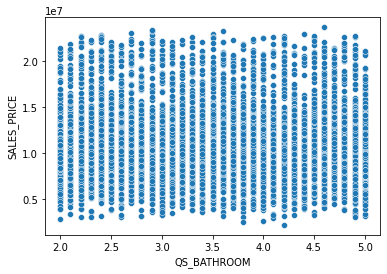

In [210]:
sns.scatterplot(data=data,x='QS_BATHROOM',y='SALES_PRICE')

* **NO LINEAR RELATIONSHIP**

---



QS_BEDROOM

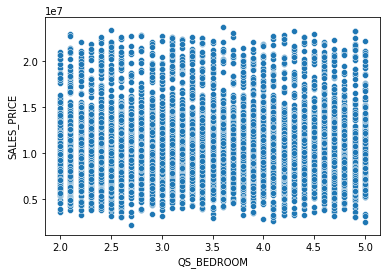

In [211]:
sns.scatterplot(data=data,x = 'QS_BEDROOM',y = 'SALES_PRICE')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


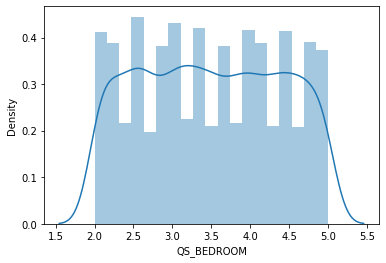

In [212]:
sns.distplot(data['QS_BEDROOM'])

 **No linear relationship**

QS_OVERALL

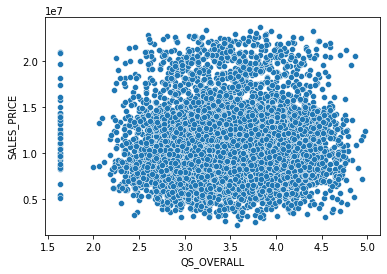

In [213]:
sns.scatterplot(data=data,x = 'QS_OVERALL',y = 'SALES_PRICE')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


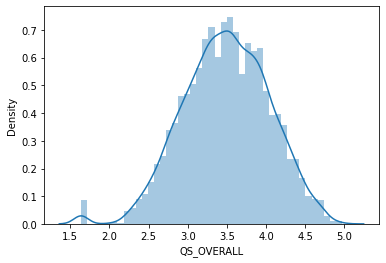

In [214]:
sns.distplot(data['QS_OVERALL'])

* **NO LINEAR RELATIONSHIP**

In [215]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SOLD_AGE
0,Karapakkam,1004,131,1,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [216]:
data.corr()['SALES_PRICE']

INT_SQFT         0.612125
DIST_MAINROAD    0.018783
N_BEDROOM        0.330987
N_BATHROOM       0.108866
N_ROOM           0.602760
QS_ROOMS         0.021967
QS_BATHROOM     -0.011377
QS_BEDROOM       0.018804
QS_OVERALL       0.013854
SALES_PRICE      1.000000
SOLD_AGE        -0.118842
Name: SALES_PRICE, dtype: float64

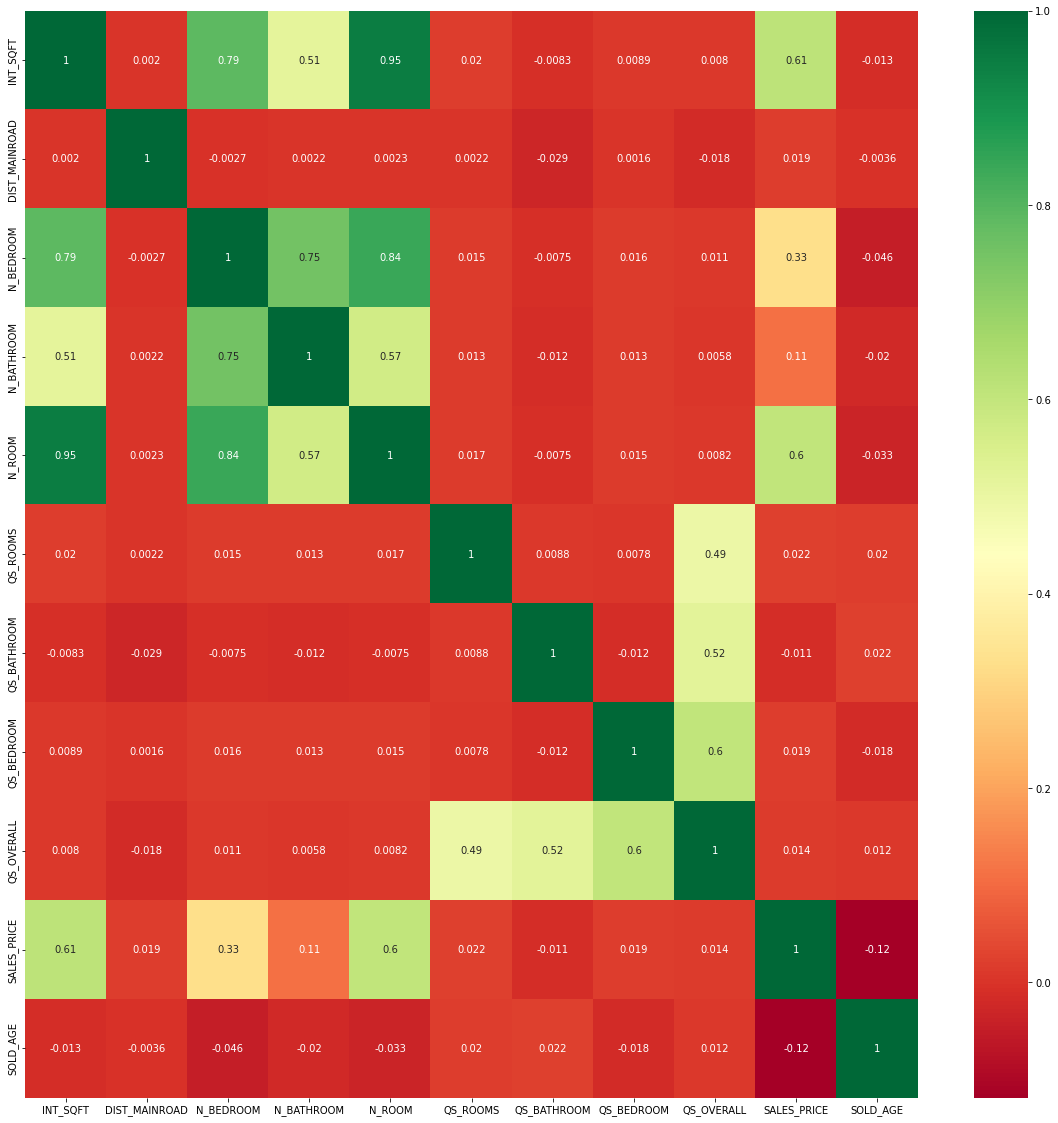

In [217]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

ENCODING

In [218]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data["AREA"]= data["AREA"].map({'Karapakkam':1,'Adyar': 2,'Chrompet' :3,'Velachery' :4,'KK Nagar':5,'Anna Nagar': 6, 'T Nagar':7})

In [219]:
data["SALE_COND"]= data["SALE_COND"].map({'Partial':1,'Family':2, 'AbNormal':3,'Normal Sale':4,'AdjLand':5})

In [220]:
data['PARK_FACIL'] = data['PARK_FACIL'].map({'Yes':2,'No':1})

In [221]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].map({'ELO':1,'No Sewage':3,'No Sewer':4,'AllPub':6})

In [222]:
data['STREET'] = data['STREET'].map({'No Access':1,'Paved':3,'Gravel':4})

In [223]:
data["MZZONE"]= data["MZZONE"].map({'A':1,'C':2, 'I':3,'RH':5,'RL':6,'RM':7})

In [224]:
dummies1 = pd.get_dummies(data["BUILDTYPE"])

In [225]:
data= pd.concat([data,dummies1], axis=1)

In [226]:
data = data.drop('BUILDTYPE',axis=1)

In [227]:
data = data.drop(['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1)

In [228]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,SOLD_AGE,Commercial,House,Others
0,1,1004,131,1,1.0,3,3,2,6,3,1,7600000,44,1,0,0
1,6,1986,26,2,1.0,5,3,1,6,4,5,21717770,11,1,0,0
2,2,909,70,1,1.0,3,3,2,1,4,6,13159200,20,1,0,0
3,4,1855,14,3,2.0,5,2,1,4,3,3,9630290,22,0,0,1
4,1,1226,84,1,1.0,3,3,2,6,4,2,7406250,30,0,0,1


In [232]:
X = data.drop('SALES_PRICE',axis = 1)
y = data['SALES_PRICE']

In [230]:
X.shape,y.shape

((7109, 15), (7109,))

In [234]:
X.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SOLD_AGE,Commercial,House,Others
0,1,1004,131,1,1.0,3,3,2,6,3,1,44,1,0,0
1,6,1986,26,2,1.0,5,3,1,6,4,5,11,1,0,0
2,2,909,70,1,1.0,3,3,2,1,4,6,20,1,0,0
3,4,1855,14,3,2.0,5,2,1,4,3,3,22,0,0,1
4,1,1226,84,1,1.0,3,3,2,6,4,2,30,0,0,1


# **Train_test Split**

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=0)

* **SCALING**

In [236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [237]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 15), (1422, 15), (5687,), (1422,))

# **LINEAR REGRESSION**

In [242]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9239609560285434

In [243]:
y_pred= lr.predict(X_test)
y_pred

array([14116410.36431889, 13602362.36431889, 18499130.36431889, ...,
       13791802.36431889, 15876666.36431889,  8053306.36431889])

In [244]:
lr.intercept_

10927674.364318894

In [245]:
lr.coef_

array([ 1.05148203e+06,  6.45687204e+05,  1.05590588e+04, -1.28844827e+06,
        1.17236580e+05,  1.79213720e+06,  2.21593682e+05,  5.18511189e+05,
        5.06964955e+04,  3.89621502e+05,  8.64286179e+05, -2.14016667e+05,
       -1.30365820e+19, -1.31435690e+19, -1.29636459e+19])

In [246]:
coef_df= pd.DataFrame(lr.coef_, X.columns, columns=["Co-efficient"])  
coef_df

,Co-efficient
AREA,1.051482e+06
INT_SQFT,6.456872e+05
DIST_MAINROAD,1.055906e+04
N_BEDROOM,-1.288448e+06
N_BATHROOM,1.172366e+05
N_ROOM,1.792137e+06
SALE_COND,2.215937e+05
PARK_FACIL,5.185112e+05
UTILITY_AVAIL,5.069650e+04
STREET,3.896215e+05


In [247]:
from sklearn.metrics import r2_score
acc= r2_score(y_test,lr.predict(X_test))
acc

0.9239609560285434

# **K Nearest Neighbour**

In [248]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsRegressor(i)                #best value of k =5, 0.9365004288125102
  knn.fit(X_train, y_train)
  print("K value  :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  : 1 Cross Value Accuracy : 0.9056585254608607
K value  : 2 Cross Value Accuracy : 0.9251191654865428
K value  : 3 Cross Value Accuracy : 0.9335914623479958
K value  : 4 Cross Value Accuracy : 0.934943025607137
K value  : 5 Cross Value Accuracy : 0.9364850058172836
K value  : 6 Cross Value Accuracy : 0.9358787129380957
K value  : 7 Cross Value Accuracy : 0.9354532332878712
K value  : 8 Cross Value Accuracy : 0.9344940587967233
K value  : 9 Cross Value Accuracy : 0.9334398751087634
K value  : 10 Cross Value Accuracy : 0.9320803974172254
K value  : 20 Cross Value Accuracy : 0.919315239906689
K value  : 30 Cross Value Accuracy : 0.912020125823776
K value  : 40 Cross Value Accuracy : 0.9057313023095814
K value  : 50 Cross Value Accuracy : 0.9011516550966926


# **Decision Tree**

In [249]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60,70,100,150]:
  dt= DecisionTreeRegressor(max_depth= depth)
  dt.fit(X_train, y_train)
  accuracy= r2_score(y_test,dt.predict(X_test))
  val= cross_val_score(dt, X, y, cv=10)
  print('K:',depth,'R2 Score:',accuracy,'Cross Val Score:',np.mean(val))

K: 1 R2 Score: 0.3549736023125779 Cross Val Score: 0.3588875752516194
K: 2 R2 Score: 0.7003834039205055 Cross Val Score: 0.6819059001742293
K: 3 R2 Score: 0.8008214951832524 Cross Val Score: 0.8016324100218641
K: 4 R2 Score: 0.8807799567746913 Cross Val Score: 0.8820146308226893
K: 5 R2 Score: 0.9146638411022208 Cross Val Score: 0.9151939950985589
K: 6 R2 Score: 0.9370783882679491 Cross Val Score: 0.9358665043374771
K: 7 R2 Score: 0.9481395134303794 Cross Val Score: 0.9505404259155558
K: 8 R2 Score: 0.9603059190732203 Cross Val Score: 0.9619904544409736
K: 9 R2 Score: 0.9666905513788867 Cross Val Score: 0.9683185328179599
K: 10 R2 Score: 0.9691855062009002 Cross Val Score: 0.9715587311747889
K: 20 R2 Score: 0.972940220344289 Cross Val Score: 0.9733910866422276
K: 40 R2 Score: 0.973252680947242 Cross Val Score: 0.9730493560248125
K: 60 R2 Score: 0.9730809824815639 Cross Val Score: 0.9730949536015515
K: 70 R2 Score: 0.9730707826112112 Cross Val Score: 0.9731055423298036
K: 100 R2 Score: 

* **FEATURE IMPORTANCE**

In [250]:
dt= DecisionTreeRegressor(max_depth= 60)
dt.fit(X_train, y_train)  # area, int_sqft, commericial buildtype, mzzone , park_facl
# Get numerical feature importances
importances = list(dt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('AREA', 0.49),
 ('Commercial', 0.32),
 ('INT_SQFT', 0.11),
 ('MZZONE', 0.04),
 ('PARK_FACIL', 0.02),
 ('STREET', 0.01),
 ('DIST_MAINROAD', 0.0),
 ('N_BEDROOM', 0.0),
 ('N_BATHROOM', 0.0),
 ('N_ROOM', 0.0),
 ('SALE_COND', 0.0),
 ('UTILITY_AVAIL', 0.0),
 ('SOLD_AGE', 0.0),
 ('House', 0.0),
 ('Others', 0.0)]

In [251]:
dt= DecisionTreeRegressor(max_depth= 60)
dt.fit(X_train, y_train)
pred= dt.predict(X_test)
accuracy= r2_score(y_test,pred)
print(accuracy)

0.9723243764222229


In [252]:
data2= pd.DataFrame({"Actual": y_test, "Predicted": pred})
data2

,Actual,Predicted
3913,13376150,13756100.0
2726,12857440,12459280.0
6220,19124310,19376950.0
2716,4905000,4484500.0
5459,13534450,14239850.0
...,...,...
3524,9987005,9821540.0
3010,5821000,5947625.0
66,13364730,14086140.0
1642,17115030,17991120.0


# **XG BOOST REGRESSOR**

In [253]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_test,y_test), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.40411510282864693  Cross-Val score :  -0.382646343858797
Learning rate :  0.02  Train score :  0.7463416238989984  Cross-Val score :  0.7438225429743233
Learning rate :  0.03  Train score :  0.9270067255166086  Cross-Val score :  0.9226724630076566
Learning rate :  0.04  Train score :  0.9637855343131054  Cross-Val score :  0.960382225425327
Learning rate :  0.05  Train score :  0.9755752082919662  Cross-Val score :  0.9729224191817083
Learning rate :  0.1  Train score :  0.9924737477551193  Cross-Val score :  0.991233239780396
Learning rate :  0.11  Train score :  0.9936592224813316  Cross-Val score :  0.9922769193265921
Learning rate :  0.12  Train score :  0.9938934955675388  Cross-Val score :  0.9931424325225038
Learning rate :  0.13  Train score :  0.9946042949659738  Cross-Val score :  0.9939259564112289
Learning rate :  0.14  Train score :  0.9951101765989782  Cross-Val score :  0.9944875308610177
Learning rate :  0.15  Train score :  0.9

* **FEATURE IMPORTANCE**

In [254]:
 model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
 model.fit(X_train,y_train)

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(list(X.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Commercial', 0.42123),
 ('AREA', 0.34278),
 ('PARK_FACIL', 0.08268),
 ('MZZONE', 0.04208),
 ('INT_SQFT', 0.03207),
 ('STREET', 0.02425),
 ('House', 0.02094),
 ('N_ROOM', 0.00833),
 ('SALE_COND', 0.00698),
 ('N_BEDROOM', 0.00689),
 ('N_BATHROOM', 0.00453),
 ('SOLD_AGE', 0.00282),
 ('Others', 0.00215),
 ('UTILITY_AVAIL', 0.00213),
 ('DIST_MAINROAD', 0.00013)]

# **Comparing All models**

*   The r2 score of Linear Regression model is : **0.9240120429715435**
*   The cross validation score of an KNN regresssor model: **0.9365004288125102**
*   The cross validation score of Decison tree regressor model: **0.9732589536311128**
*   The cross validation score of an XG_Boost regessor model is :**0.9971239930999772**